In [192]:
import pandas as pd
from scipy.io import arff
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from scipy import stats


In [193]:
arff_file = arff.loadarff('KDDTrain+.arff')
arff_file

(array([(0., b'tcp', b'ftp_data', b'SF',  491.,   0., b'0', 0., 0., 0., 0., b'0', 0., 0., 0., 0., 0., 0., 0., 0., b'0', b'0',   2., 2., 0., 0., 0., 0., 1.  , 0.  , 0., 150., 25., 0.17, 0.03, 0.17, 0., 0.  , 0., 0.05, 0., b'normal'),
        (0., b'udp', b'other', b'SF',  146.,   0., b'0', 0., 0., 0., 0., b'0', 0., 0., 0., 0., 0., 0., 0., 0., b'0', b'0',  13., 1., 0., 0., 0., 0., 0.08, 0.15, 0., 255.,  1., 0.  , 0.6 , 0.88, 0., 0.  , 0., 0.  , 0., b'normal'),
        (0., b'tcp', b'private', b'S0',    0.,   0., b'0', 0., 0., 0., 0., b'0', 0., 0., 0., 0., 0., 0., 0., 0., b'0', b'0', 123., 6., 1., 1., 0., 0., 0.05, 0.07, 0., 255., 26., 0.1 , 0.05, 0.  , 0., 1.  , 1., 0.  , 0., b'anomaly'),
        ...,
        (0., b'tcp', b'smtp', b'SF', 2231., 384., b'0', 0., 0., 0., 0., b'1', 0., 0., 0., 0., 0., 0., 0., 0., b'0', b'0',   1., 1., 0., 0., 0., 0., 1.  , 0.  , 0., 255., 30., 0.12, 0.06, 0.  , 0., 0.72, 0., 0.01, 0., b'normal'),
        (0., b'tcp', b'klogin', b'S0',    0.,   0., b'0', 0., 

In [194]:
df = pd.DataFrame(arff_file[0])
df

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0.0,b'tcp',b'ftp_data',b'SF',491.0,0.0,b'0',0.0,0.0,0.0,...,25.0,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,b'normal'
1,0.0,b'udp',b'other',b'SF',146.0,0.0,b'0',0.0,0.0,0.0,...,1.0,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,b'normal'
2,0.0,b'tcp',b'private',b'S0',0.0,0.0,b'0',0.0,0.0,0.0,...,26.0,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,b'anomaly'
3,0.0,b'tcp',b'http',b'SF',232.0,8153.0,b'0',0.0,0.0,0.0,...,255.0,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,b'normal'
4,0.0,b'tcp',b'http',b'SF',199.0,420.0,b'0',0.0,0.0,0.0,...,255.0,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,b'normal'
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0.0,b'tcp',b'private',b'S0',0.0,0.0,b'0',0.0,0.0,0.0,...,25.0,0.10,0.06,0.00,0.00,1.00,1.00,0.00,0.00,b'anomaly'
125969,8.0,b'udp',b'private',b'SF',105.0,145.0,b'0',0.0,0.0,0.0,...,244.0,0.96,0.01,0.01,0.00,0.00,0.00,0.00,0.00,b'normal'
125970,0.0,b'tcp',b'smtp',b'SF',2231.0,384.0,b'0',0.0,0.0,0.0,...,30.0,0.12,0.06,0.00,0.00,0.72,0.00,0.01,0.00,b'normal'
125971,0.0,b'tcp',b'klogin',b'S0',0.0,0.0,b'0',0.0,0.0,0.0,...,8.0,0.03,0.05,0.00,0.00,1.00,1.00,0.00,0.00,b'anomaly'


In [195]:
df[df.isna().any(axis=1)]

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class


In [196]:
le = LabelEncoder()
df['land'] = le.fit_transform(df['land'])
df['logged_in'] = le.fit_transform(df['logged_in'])
df['is_host_login'] = le.fit_transform(df['is_host_login'])
df['is_guest_login'] = le.fit_transform(df['is_guest_login'])
df['class'] = le.fit_transform(df['class'])
df

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0.0,b'tcp',b'ftp_data',b'SF',491.0,0.0,0,0.0,0.0,0.0,...,25.0,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,1
1,0.0,b'udp',b'other',b'SF',146.0,0.0,0,0.0,0.0,0.0,...,1.0,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,1
2,0.0,b'tcp',b'private',b'S0',0.0,0.0,0,0.0,0.0,0.0,...,26.0,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,0
3,0.0,b'tcp',b'http',b'SF',232.0,8153.0,0,0.0,0.0,0.0,...,255.0,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,1
4,0.0,b'tcp',b'http',b'SF',199.0,420.0,0,0.0,0.0,0.0,...,255.0,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0.0,b'tcp',b'private',b'S0',0.0,0.0,0,0.0,0.0,0.0,...,25.0,0.10,0.06,0.00,0.00,1.00,1.00,0.00,0.00,0
125969,8.0,b'udp',b'private',b'SF',105.0,145.0,0,0.0,0.0,0.0,...,244.0,0.96,0.01,0.01,0.00,0.00,0.00,0.00,0.00,1
125970,0.0,b'tcp',b'smtp',b'SF',2231.0,384.0,0,0.0,0.0,0.0,...,30.0,0.12,0.06,0.00,0.00,0.72,0.00,0.01,0.00,1
125971,0.0,b'tcp',b'klogin',b'S0',0.0,0.0,0,0.0,0.0,0.0,...,8.0,0.03,0.05,0.00,0.00,1.00,1.00,0.00,0.00,0


In [197]:
oe = OneHotEncoder(sparse_output=False)
one_hot = oe.fit_transform(df[['flag']])
one_hot

array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [198]:
one_hot_df = pd.DataFrame(one_hot, columns=oe.get_feature_names_out(['flag']))
df = pd.concat([df,one_hot_df], axis=1)
one_hot_df

,flag_b'OTH',flag_b'REJ',flag_b'RSTO',flag_b'RSTOS0',flag_b'RSTR',flag_b'S0',flag_b'S1',flag_b'S2',flag_b'S3',flag_b'SF',flag_b'SH'
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
125968,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
125969,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
125970,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
125971,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [199]:
one_hot = oe.fit_transform(df[['protocol_type']])
one_hot_df = pd.DataFrame(one_hot, columns=oe.get_feature_names_out(['protocol_type']))
df = pd.concat([df,one_hot_df], axis=1)
one_hot_df

,protocol_type_b'icmp',protocol_type_b'tcp',protocol_type_b'udp'
0,0.0,1.0,0.0
1,0.0,0.0,1.0
2,0.0,1.0,0.0
3,0.0,1.0,0.0
4,0.0,1.0,0.0
...,...,...,...
125968,0.0,1.0,0.0
125969,0.0,0.0,1.0
125970,0.0,1.0,0.0
125971,0.0,1.0,0.0


In [200]:
one_hot = oe.fit_transform(df[['service']])
one_hot_df = pd.DataFrame(one_hot, columns=oe.get_feature_names_out(['service']))
df = pd.concat([df,one_hot_df], axis=1)
one_hot_df

,service_b'IRC',service_b'X11',service_b'Z39_50',service_b'aol',service_b'auth',service_b'bgp',service_b'courier',service_b'csnet_ns',service_b'ctf',service_b'daytime',...,service_b'telnet',service_b'tftp_u',service_b'tim_i',service_b'time',service_b'urh_i',service_b'urp_i',service_b'uucp',service_b'uucp_path',service_b'vmnet',service_b'whois'
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
125969,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
125970,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
125971,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [201]:
df = df.drop_duplicates()
df = df.drop(['flag','protocol_type','service'],axis=1).reset_index()
df

,index,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,...,service_b'telnet',service_b'tftp_u',service_b'tim_i',service_b'time',service_b'urh_i',service_b'urp_i',service_b'uucp',service_b'uucp_path',service_b'vmnet',service_b'whois'
0,0,0.0,491.0,0.0,0,0.0,0.0,0.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,0.0,146.0,0.0,0,0.0,0.0,0.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,0.0,232.0,8153.0,0,0.0,0.0,0.0,0.0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,0.0,199.0,420.0,0,0.0,0.0,0.0,0.0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125959,125968,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
125960,125969,8.0,105.0,145.0,0,0.0,0.0,0.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
125961,125970,0.0,2231.0,384.0,0,0.0,0.0,0.0,0.0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
125962,125971,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [202]:
df.columns[38]

'dst_host_srv_rerror_rate'

In [203]:
df['class']

0         1
1         1
2         0
3         1
4         1
         ..
125959    0
125960    1
125961    1
125962    0
125963    1
Name: class, Length: 125964, dtype: int32

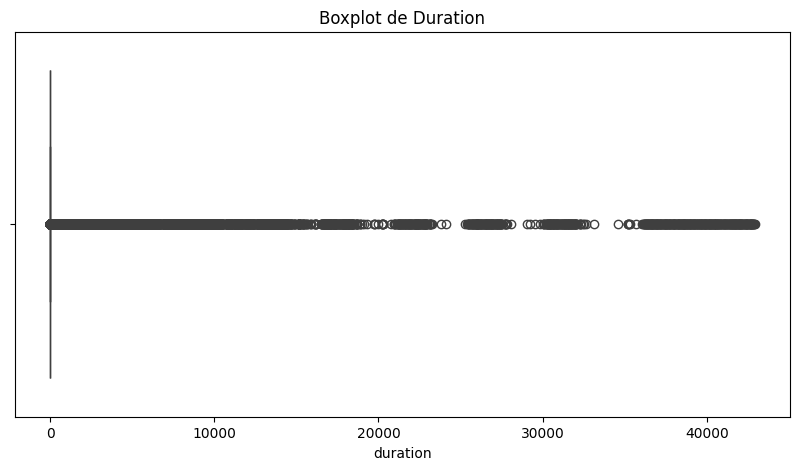

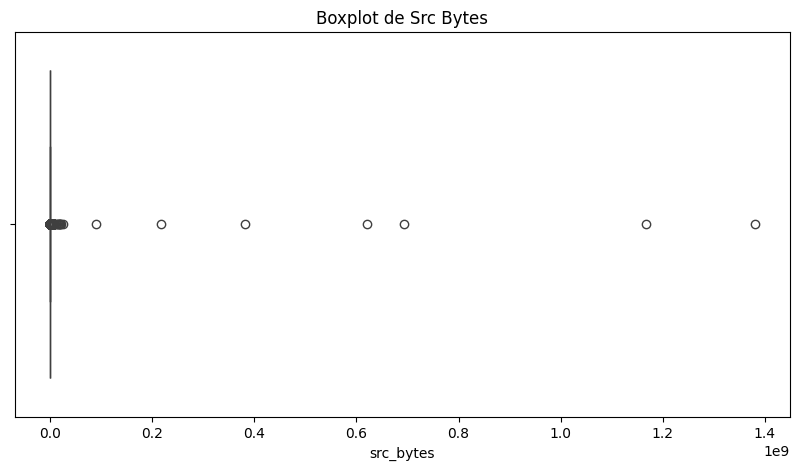

In [204]:

# Boxplot para 'duration'
plt.figure(figsize=(10, 5))
sns.boxplot(x=df['duration'])
plt.title('Boxplot de Duration')
plt.show()

# Boxplot para 'src_bytes'
plt.figure(figsize=(10, 5))
sns.boxplot(x=df['src_bytes'])
plt.title('Boxplot de Src Bytes')
plt.show()

In [205]:
cl = [
    'duration',
    'src_bytes',
    'dst_bytes',
    'wrong_fragment',
    'urgent',
    'hot',
    'num_failed_logins',
    'num_compromised',
    'root_shell',
    'su_attempted',
    'num_root',
    'num_file_creations',
    'num_shells',
    'num_access_files',
    'num_outbound_cmds',
    'count',
    'srv_count',
    'serror_rate',
    'srv_serror_rate',
    'rerror_rate',
    'srv_rerror_rate',
    'same_srv_rate',
    'diff_srv_rate',
    'srv_diff_host_rate',
    'dst_host_count',
    'dst_host_srv_count',
    'dst_host_same_srv_rate',
    'dst_host_diff_srv_rate',
    'dst_host_same_src_port_rate',
    'dst_host_srv_diff_host_rate',
    'dst_host_serror_rate',
    'dst_host_srv_serror_rate',
    'dst_host_rerror_rate',
    'dst_host_srv_rerror_rate'
]
z_scores = stats.zscore(df['duration'])
# df_no_outliers = df[(abs(z_scores) < 5).all(axis=1)]
# df_no_outliers

In [206]:
scaler = MinMaxScaler()
df[cl] = pd.DataFrame(scaler.fit_transform(df[cl]))
df = df.drop('index',axis=1)
df

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,service_b'telnet',service_b'tftp_u',service_b'tim_i',service_b'time',service_b'urh_i',service_b'urp_i',service_b'uucp',service_b'uucp_path',service_b'vmnet',service_b'whois'
0,0.000000,3.558064e-07,0.000000e+00,0,0.0,0.0,0.0,0.0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,1.057999e-07,0.000000e+00,0,0.0,0.0,0.0,0.0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.000000e+00,0.000000e+00,0,0.0,0.0,0.0,0.0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,1.681203e-07,6.223962e-06,0,0.0,0.0,0.0,0.0,1,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,1.442067e-07,3.206260e-07,0,0.0,0.0,0.0,0.0,1,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125959,0.000000,0.000000e+00,0.000000e+00,0,0.0,0.0,0.0,0.0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
125960,0.000186,7.608895e-08,1.106923e-07,0,0.0,0.0,0.0,0.0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
125961,0.000000,1.616709e-06,2.931438e-07,0,0.0,0.0,0.0,0.0,1,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
125962,0.000000,0.000000e+00,0.000000e+00,0,0.0,0.0,0.0,0.0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [207]:
#df.to_csv('Trat2.csv',sep=',',index=False)
y_classe = df.iloc[:,38].values
base2 = df.drop('class', axis=1)

In [208]:
df[df.isna().any(axis=1)]

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,service_b'telnet',service_b'tftp_u',service_b'tim_i',service_b'time',service_b'urh_i',service_b'urp_i',service_b'uucp',service_b'uucp_path',service_b'vmnet',service_b'whois'


In [209]:
X_prev = base2.iloc[:, :].values
X_treino, X_teste, y_treino, y_teste = train_test_split(X_prev, y_classe, test_size = 0.20, random_state = 0)

In [210]:
import pickle
with open('merge.pkl', mode = 'wb') as f:
  pickle.dump([X_treino, X_teste, y_treino, y_teste], f)